In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Titanic_survival dataset

In [4]:
survival = pd.read_csv('Titanic_survival (1).csv')
survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
survival.shape

(418, 2)

## Loading the test dataset

In [6]:
test = pd.read_csv('test (2).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.shape

(418, 11)

## The combined data set

In [8]:
data = pd.merge(survival, test, on='PassengerId')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
data.shape

(418, 12)

***Totally, there are 418 observations and 12 features in our data to do the analysis.***

## Missing values

In [12]:
data.isnull().sum() / len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

**We have missing data in Age and Cabin attributes but in fare, we only have 1 missing values so its better to drop that entity.**

## Summary Statistics

In [41]:
data_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Diving the complete data based on the datatype i.e., data_num has all the numeric data and data_cat has all the categoricla data

In [135]:
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [136]:
data_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875
5,897,0,3,14.0,0,0,9.2250
6,898,1,3,30.0,0,0,7.6292
7,899,0,2,26.0,1,1,29.0000
8,900,1,3,18.0,0,0,7.2292
9,901,0,3,21.0,2,0,24.1500


In [137]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked,Title
0,"Kelly, Mr. James",male,330911,NaN,Q,mr
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S,mrs
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q,mr
3,"Wirz, Mr. Albert",male,315154,NaN,S,mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S,mrs
5,"Svensson, Mr. Johan Cervin",male,7538,NaN,S,mr
6,"Connolly, Miss. Kate",female,330972,NaN,Q,miss
7,"Caldwell, Mr. Albert Francis",male,248738,NaN,S,mr
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,2657,NaN,C,mrs
9,"Davies, Mr. John Samuel",male,A/4 48871,NaN,S,mr


## Distribution of Age

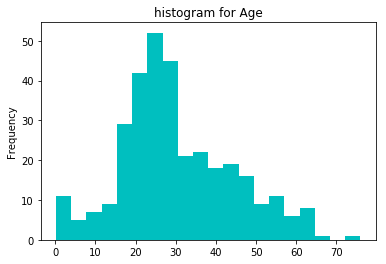

In [34]:
age_dist = data_num.Age.plot(kind='hist', title='histogram for Age', color='c', bins = 20);

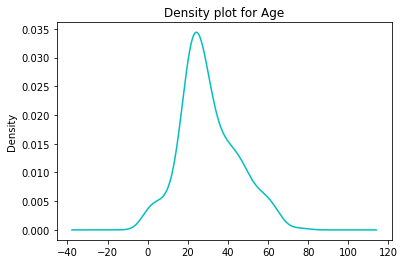

In [33]:
data_num.Age.plot(kind='kde', title='Density plot for Age', color='c');

In [43]:
data_num.Age.skew()

0.4573612871503845

***We have the major population is around the age of 15 - 40 and it is around 75% and also the distribution is very less skewed meaning there are very less outliers.***

In [19]:
from scipy.stats import skew

In [27]:
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

In [28]:
data_num_skew

SibSp    4.153363
Parch    4.637742
Fare     3.673937
dtype: float64

***Fare is highly skewed indicating the presence of Outliers.***

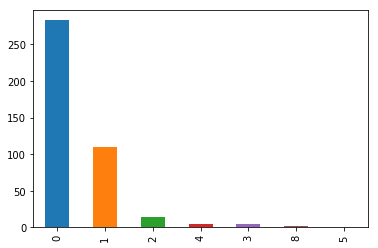

In [42]:
data_num.SibSp.value_counts().plot(kind = 'bar')

***So by from above plot we can say that there are a lot of people who are travelling alone***

## Ans1: Survival percentage

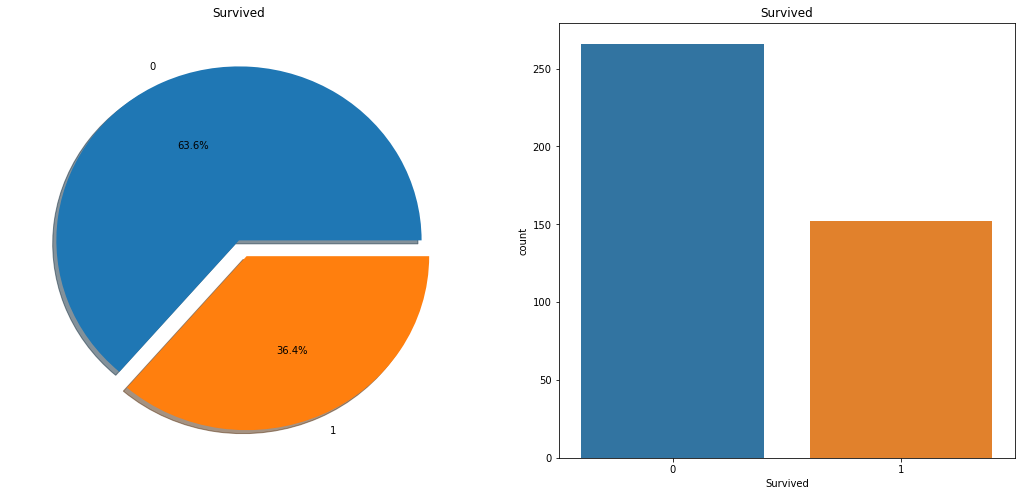

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_num['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data_num,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [45]:
data_num.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

# 1: Survived, 0: Not Survived
- We have a huge proportion(63.6%) of people who didnt survive the disaster with the number being 266 people.
- We only have roughly 36.4% survival rate with the number being 152.

## To find which category of people survived the crash we need to analyse more with the other features. But before proceeding we need to convert the datatypes of the categorical data.

In [46]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
5,"Svensson, Mr. Johan Cervin",male,7538,NaN,S
6,"Connolly, Miss. Kate",female,330972,NaN,Q
7,"Caldwell, Mr. Albert Francis",male,248738,NaN,S
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,2657,NaN,C
9,"Davies, Mr. John Samuel",male,A/4 48871,NaN,S


In [48]:
data_cat.dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

- Sex and Embarked are the Nominal Categorical variables having more than one categories.
- Pclass is the Ordinal Categorical variable (since it is ordered) with class 1 being the uppper class.
- All the other variables are coontinuous variables.

## Using the original Dataset

In [49]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Ans 2 & Ans 3: Kind of passengers who didnt survive and those who survived and the complete EDA.

## Exploring Pclass feature

In [53]:
pd.crosstab(data.Survived,data.Pclass)

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


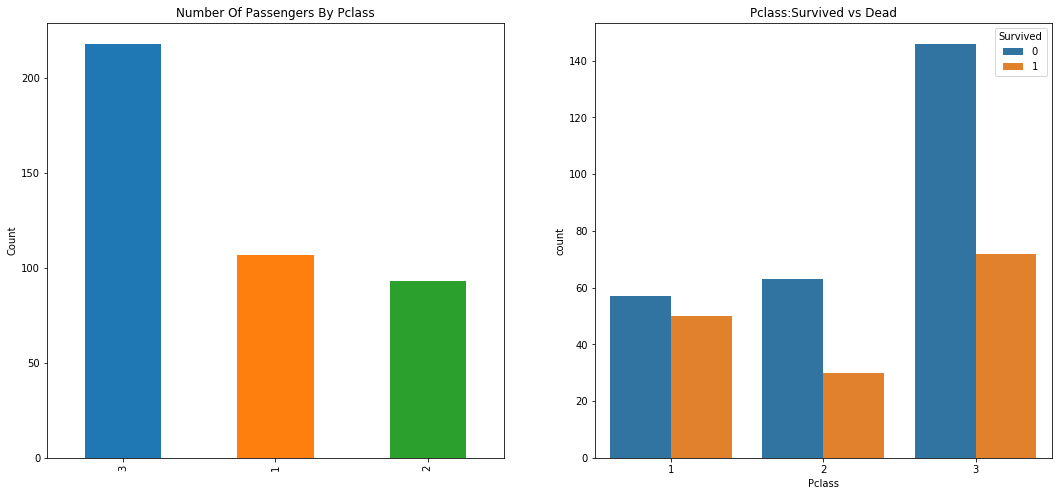

In [55]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- We can see that the number of passengers were more in Class 3 compared to other two classes but the survival rate for class 3 is very less compared to the higher class people(1).
- Probably the rich class people with good influence and power might have gone for class 1 because of which we have a higher survival rate (87%) which is pretty high in this class even though the number of people here are very less compared to the third class(3) where we had a high proportion of total people but the survival percentage is only 50%.

## Exploring the Gender attribute

In [63]:
data.groupby('Sex').Survived.count()

Sex
female    152
male      266
Name: Survived, dtype: int64

In [59]:
pd.crosstab(data.Sex, data.Survived)

Survived,0,1
Sex,,
female,0,152
male,266,0


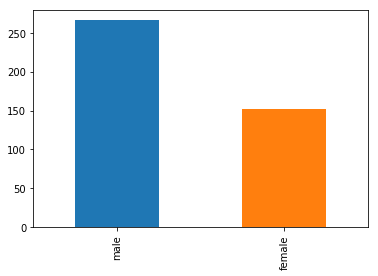

In [58]:
data.Sex.value_counts().plot(kind = 'bar')

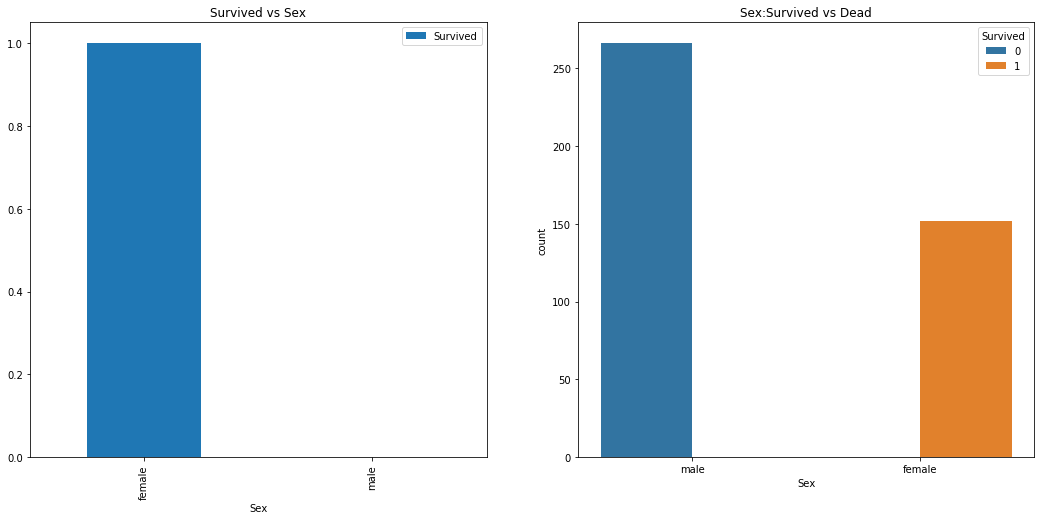

In [64]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- To our surprise, we see that only FEMALES survived.
- We have a 100% survival rate for Females and a big 0% for males even though we have huge number of people in Male category.
- This is indicating GENDER IN-EQUALITY.
- So from every class, only females survived.

## Exploring Age

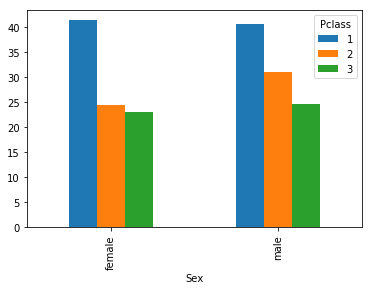

In [68]:
data.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean').plot(kind = 'bar')

In [69]:
data.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,41.333333,24.376552,23.073400
male,40.520000,30.940678,24.525104


In [82]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,0,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,0,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,0,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,0,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,0,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


- We have 86 rows having missing values in Age.
- We have missing data in Age so we need to impute those missing values.
- We can impute these missing values based on the title of the name.
- Example: Master is associated to the children, Miss is associated with females who are unmarried and in a range of 25-35 Years etc... and based on these we check for the age group of people belonging to these Titles and we replace it with the mean or median values of respective titles.

## Extracting the titles of the names

In [83]:
def Title_of_Person(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [87]:
titles = data.Name.map(lambda x : Title_of_Person(x))

***We have extracted the titles of each person***

In [89]:
len(titles)

418

## Titles and Frequency

In [90]:
titles.value_counts()

mr        240
miss       78
mrs        72
master     21
col         2
rev         2
dr          1
ms          1
dona        1
Name: Name, dtype: int64

In [92]:
data['Title'] =  data.Name.map(lambda x : Title_of_Person(x))

In [98]:
data.groupby('Title').Age.median()

Title
col       50.0
dona      39.0
dr        53.0
master     7.0
miss      22.0
mr        28.5
mrs       36.5
ms         NaN
rev       35.5
Name: Age, dtype: float64

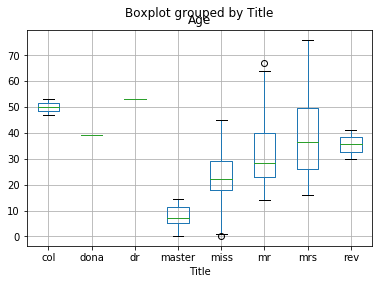

In [94]:
data[data.Age.notnull()].boxplot('Age','Title');

## Replacing the missing values in the age with the median of the group to which the person belongs

In [95]:
title_age_median = data.groupby('Title').Age.transform('median')
data.Age.fillna(title_age_median , inplace=True)

In [97]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,1,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,ms


In [96]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

***Even after replacing missing values with in age, we have one entity missing because we only have one person belonging to group of that title***

In [104]:
survived_age = data[data.Survived == 1]

In [105]:
notsurvived_age = data[data.Survived == 0]

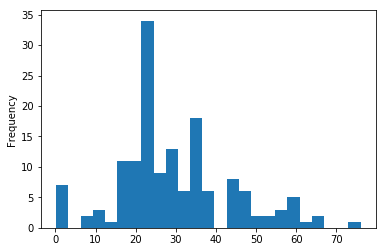

In [110]:
survived_age.Age.plot(kind = 'hist',bins = 25)

- The older age group, women and Children were the first priority to be saved.

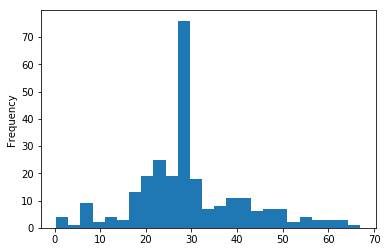

In [111]:
notsurvived_age.Age.plot(kind = 'hist', bins = 25)

- Compared to the people belonging to the age group of <10, many survived but few people couldnt survive.
- The highest deaths belonged to the age group of 20-30

## Embarked Feature

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


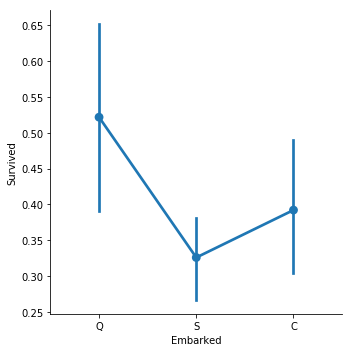

In [116]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
plt.show()

- Chances of survival is highest for people who embarked at Q with least being S and all the survived being FEMALE

In [117]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,mrs
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,mr
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,miss
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,mr
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,mrs
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,mr


# Fare Feature

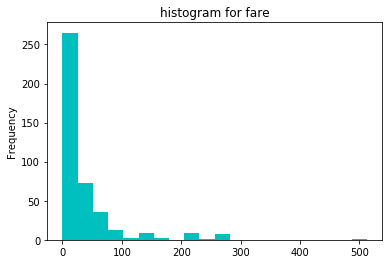

In [122]:
data.Fare.plot(kind='hist', title='histogram for fare', color='c', bins = 20);

In [123]:
data.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [125]:
data.pivot_table(index='Pclass',columns = 'Survived',values='Fare', aggfunc='mean')

Survived,0,1
Pclass,,
1,75.586551,115.591168
2,20.184654,26.438750
3,11.826350,13.735129


- The fare attribute is highly right skewed since there are only few people who could afford the higher priced tickets and these high fare belong to class 1.
- We see that people who paid higher fares for the ticket survived the most.

In [141]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,mrs
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,mr
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,miss
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,mr
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,mrs
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,mr


## We drop Cabin feature since it has more than 50% of values missing

In [144]:
data = data.drop('Cabin', axis = 1)

In [145]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
Title            object
dtype: object

In [143]:
data['Pclass'] = data.Pclass.astype('category')

In [146]:
data['Sex'] = data.Sex.astype('category')
data['Embarked'] = data.Embarked.astype('category')
data['Title'] = data.Title.astype('category')

## Converting the Datatypes

In [147]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
Title          category
dtype: object

In [159]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
Title          category
dtype: object

In [160]:
data['Survived'] = data.Survived.astype('category')

In [152]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,mrs
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,mr
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,miss
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,mr
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,mrs
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,mr


In [161]:
new_data = data.drop(['Name','Ticket'],axis = 1)

In [162]:
new_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,0,3,male,34.5,0,0,7.8292,Q,mr
1,893,1,3,female,47.0,1,0,7.0000,S,mrs
2,894,0,2,male,62.0,0,0,9.6875,Q,mr
3,895,0,3,male,27.0,0,0,8.6625,S,mr
4,896,1,3,female,22.0,1,1,12.2875,S,mrs
5,897,0,3,male,14.0,0,0,9.2250,S,mr
6,898,1,3,female,30.0,0,0,7.6292,Q,miss
7,899,0,2,male,26.0,1,1,29.0000,S,mr
8,900,1,3,female,18.0,0,0,7.2292,C,mrs
9,901,0,3,male,21.0,2,0,24.1500,S,mr


## Using only the categorical and continuous variables for further analysis

In [163]:
new_data_dummies = pd.get_dummies(new_data,drop_first=True)

In [164]:
new_data_dummies

,PassengerId,Age,SibSp,Parch,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_dona,Title_dr,Title_master,Title_miss,Title_mr,Title_mrs,Title_ms,Title_rev
0,892,34.5,0,0,7.8292,0,0,1,1,1,0,0,0,0,0,1,0,0,0
1,893,47.0,1,0,7.0000,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,894,62.0,0,0,9.6875,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3,895,27.0,0,0,8.6625,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,896,22.0,1,1,12.2875,1,0,1,0,0,1,0,0,0,0,0,1,0,0
5,897,14.0,0,0,9.2250,0,0,1,1,0,1,0,0,0,0,1,0,0,0
6,898,30.0,0,0,7.6292,1,0,1,0,1,0,0,0,0,1,0,0,0,0
7,899,26.0,1,1,29.0000,0,1,0,1,0,1,0,0,0,0,1,0,0,0
8,900,18.0,0,0,7.2292,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9,901,21.0,2,0,24.1500,0,0,1,1,0,1,0,0,0,0,1,0,0,0


In [165]:
new_data_dummies.corr()

,PassengerId,Age,SibSp,Parch,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_dona,Title_dr,Title_master,Title_miss,Title_mr,Title_mrs,Title_ms,Title_rev
PassengerId,1.000000,-0.053440,0.003818,0.043080,0.008211,-0.023245,0.077295,-0.054692,0.023245,-0.035731,0.048008,0.083399,0.034293,0.043612,0.005089,0.007498,-0.039327,-0.048903,-0.029880
Age,-0.053440,1.000000,-0.087587,-0.029286,0.340098,0.013897,-0.034297,-0.381186,-0.013897,-0.063505,-0.102870,0.035246,0.088183,-0.396925,-0.290893,0.133816,0.313237,NaN,0.031167
SibSp,0.003818,-0.087587,1.000000,0.306895,0.171539,0.099943,-0.042418,0.018573,-0.099943,-0.098824,0.079367,-0.024459,0.030214,0.288634,0.055568,-0.228860,0.076320,-0.024459,0.004074
Parch,0.043080,-0.029286,0.306895,1.000000,0.230046,0.159120,-0.026335,0.026719,-0.159120,-0.132948,0.092201,-0.019600,0.030356,0.231953,0.002488,-0.257458,0.205219,-0.019600,0.007615
Fare,0.008211,0.340098,0.171539,0.230046,1.000000,0.191514,-0.128806,-0.432160,-0.191514,-0.155562,-0.178582,0.064335,0.040592,0.011823,0.038318,-0.208836,0.199184,-0.024477,-0.020049
Survived_1,-0.023245,0.013897,0.099943,0.159120,0.191514,1.000000,-0.045655,-0.072405,-1.000000,0.115574,-0.105883,0.064781,-0.037018,-0.173858,0.633617,-0.877762,0.603458,0.064781,-0.052414
Pclass_2,0.077295,-0.034297,-0.042418,-0.026335,-0.128806,-0.045655,1.000000,-0.558487,0.045655,-0.114588,0.215634,-0.026196,-0.026196,-0.070366,-0.019992,0.065176,-0.030758,-0.026196,0.129619
Pclass_3,-0.054692,-0.381186,0.018573,0.026719,-0.432160,-0.072405,-0.558487,1.000000,0.072405,0.260301,0.011883,-0.051126,-0.051126,0.132596,0.089989,0.037120,-0.184544,0.046905,-0.072391
Sex_male,0.023245,-0.013897,-0.099943,-0.159120,-0.191514,-1.000000,0.045655,0.072405,1.000000,-0.115574,0.105883,-0.064781,0.037018,0.173858,-0.633617,0.877762,-0.603458,-0.064781,0.052414
Embarked_Q,-0.035731,-0.063505,-0.098824,-0.132948,-0.155562,0.115574,-0.114588,0.260301,-0.115574,1.000000,-0.474962,-0.017220,-0.017220,-0.045880,0.263252,-0.083662,-0.140166,0.139259,-0.024382


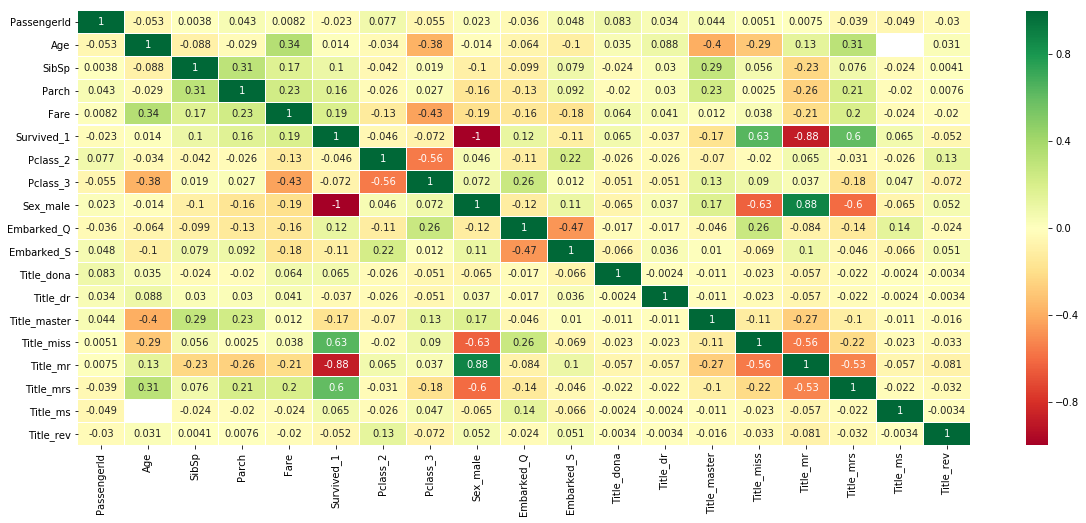

In [169]:
sns.heatmap(new_data_dummies.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

## Ans 3(continuation): From the above correlation matrix, we are considering the features with correlation values above and below 0.7 as the most influential features in deciding the survival rate of a person.